In [1]:
import pandas as pd
import seaborn as sns
import time
import xgboost
import numpy as np
import matplotlib.pyplot as plt

import statsmodels as sm
from statsmodels.api import OLS
from statsmodels.api import add_constant

sns.set_theme(style="whitegrid")
sns.set_palette(palette="Paired")
SEED: int = 42

# Load Data
We load the already processed data from the `data/processed` directory

In [2]:
X_train = pd.read_csv("../../data/processed/train_data_cleaned.csv", index_col="building_id")
y_train = pd.read_csv("../../data/processed/train_labels.csv", index_col="building_id", usecols=["building_id", "damage_grade"])

In [3]:
# Add constant for intercept
X_train = add_constant(X_train)
X_train.head(5)

,const,count_families,count_floors_pre_eq,geo_level_1_id,geo_level_2_id,geo_level_3_id,has_secondary_use,has_superstructure_cement_mortar_brick,has_superstructure_mud_mortar_stone,age,area_percentage,superstructure_quality,foundation_type_r,ground_floor_type_f,ground_floor_type_v,land_surface_condition_t,other_floor_type_q,position_s,roof_type_n
building_id,,,,,,,,,,,,,,,,,,,
802906,1.0,0.111111,0.125,0.200000,0.341275,0.970637,0.0,0.0,1.0,0.121343,0.247589,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
28830,1.0,0.111111,0.125,0.266667,0.630694,0.223761,0.0,0.0,1.0,0.040448,0.346625,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
94947,1.0,0.111111,0.125,0.700000,0.254380,0.714013,0.0,0.0,1.0,0.040448,0.198071,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
590882,1.0,0.111111,0.125,0.733333,0.292922,0.850959,0.0,0.0,1.0,0.040448,0.247589,0.5,1.0,1.0,0.0,1.0,0.0,1.0,1.0
201944,1.0,0.111111,0.250,0.366667,0.091801,0.118405,0.0,0.0,0.0,0.121343,0.346625,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0


In [4]:
# Drop columns with very high p-value
#X_train = X_train.drop(["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "land_surface_condition_t"], axis=1)

# Fit Linear Regression

In [5]:
model = OLS(endog=y_train, exog=X_train)
res = model.fit()

In [6]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           damage_grade   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     3252.
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        12:38:45   Log-Likelihood:            -2.1533e+05
No. Observations:              260601   AIC:                         4.307e+05
Df Residuals:                  260582   BIC:                         4.309e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.0492      0.008    250.194      0.000       2.033       2.065
count_families                             0.4948      0.024     20.981      0.000       0.449       0.541
count_floors_pre_eq                        0.5162      0.014     37.394      0.000       0.489       0.543
geo_level_1_id                             0.0465      0.004     11.094      0.000       0.038       0.055
geo_level_2_id                            -0.0023      0.004     -0.602      0.547      -0.010       0.005
geo_level_3_id                             0.0134      0.004      3.577      0.000       0.006       0.021
has_secondary_use                         -0.0536      0.004    -15.247      0.000      -0.061      -0.047
has_superstructure_cement_mortar_brick    -0.2151      0.006    -38.616      0.000      -0.226      -0.204
has_superstructure_mud_mortar_stone        0.1302      0.003     37.516      0.000       0.123       0.137
age                                        0.1128      0.011     10.205      0.000       0.091       0.134
area_percentage                           -0.0844      0.006    -13.244      0.000      -0.097      -0.072
superstructure_quality                    -0.2989      0.004    -67.814      0.000      -0.307      -0.290
foundation_type_r                          0.2083      0.004     49.994      0.000       0.200       0.216
ground_floor_type_f                        0.0221      0.004      6.022      0.000       0.015       0.029
ground_floor_type_v                       -0.2596      0.006    -44.451      0.000      -0.271      -0.248
land_surface_condition_t                  -0.0023      0.003     -0.775      0.438      -0.008       0.003
other_floor_type_q                        -0.0533      0.003    -19.959      0.000      -0.058      -0.048
position_s                                -0.0812      0.003    -29.475      0.000      -0.087      -0.076
roof_type_n                               -0.0513      0.003    -20.310      0.000      -0.056      -0.046
==============================================================================
Omnibus:                    13659.812   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5302.826
Skew:                          -0.017   Prob(JB):                         0.00
Kurtosis:                       2.302   Cond. No.                         54.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Analysis: Residuals

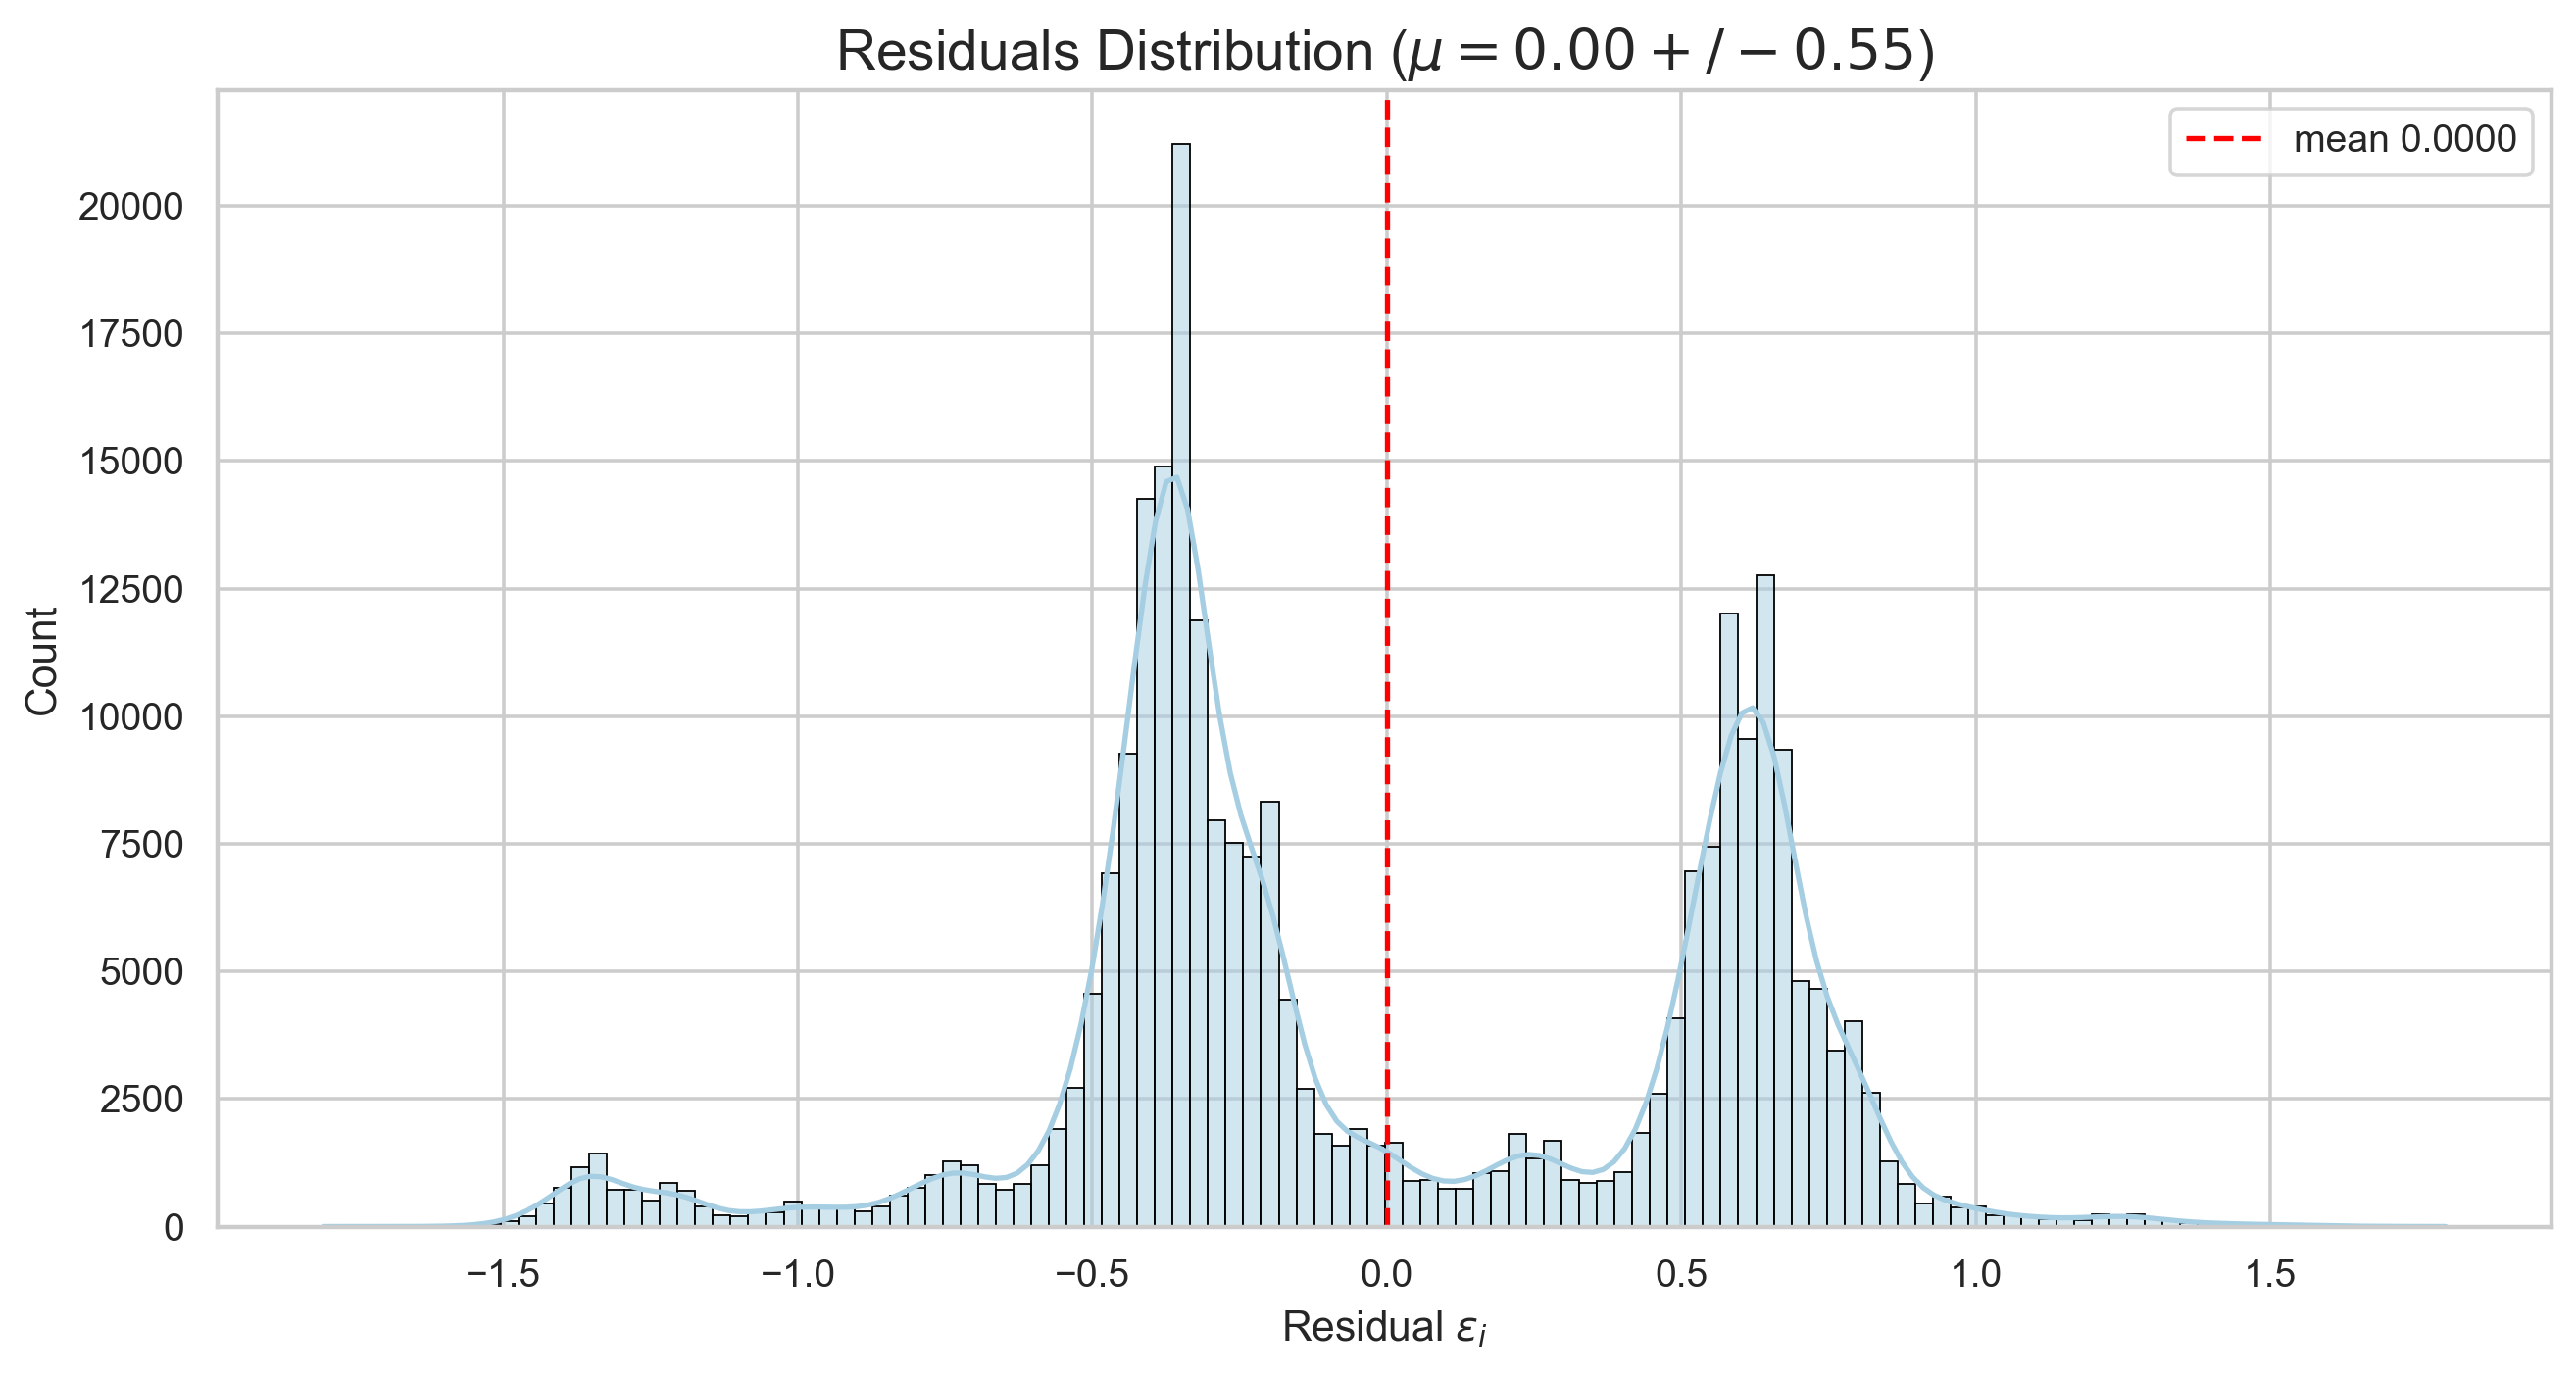

In [29]:
plt.figure(figsize=(12,6), dpi=256)
plt.title(f"Residuals Distribution ($\mu = {np.mean(res.resid):.2f} +/- {np.std(res.resid):.2f}$)", size=16)
sns.histplot(res.resid, kde=True, edgecolor="black", line_kws={"color": "red"})
plt.axvline(x=np.mean(res.resid), label=f"mean {np.mean(res.resid):.4f}", color="red", linestyle="--")
plt.xlabel("Residual $\epsilon_i$")
plt.legend()
plt.show()

- Residuals are not normal distributed and therefore the assumptions for linear regression are violated
-- However, mean of the residuals is 0 and distribution is bimodal.
-- This is probably due to having a discrete target variable (i.e. a classification problem) instead of a numeric target.
- Logistic Regression more suitable, see `week04-logit-models.ipynb` notebook